# MNIST Image Recognition (Convolutional Neural Networks) using keras:

Convolutional neural networks(CNNs) have become the go to model for image classification blowing artificial networks out of the water. This is because of their ability to draw important and distinctive features from the image. They do so by using convolution layers.

CNNs due to how computationaly efficient and they are, they are arguably the most popular deep learning architecture. They are most effective in face recognition and object detection. These networks are useful in classifying images because they are very effective at recognizing useful patterns within the images by understanding that the spatial structure of the inputs is relevant. While typical neural networks ignore the spatial relevance of pixels such as pixels being closer together vs the pixels being further apart, convolutional neural networks are designed to use the spatial data for their benefit. CNNs also require a lower quantity of parameters as compared to ANNs (artificial neural networks). 

One commonality between the ANN and CNN is the input layer. Another similarity is fully connected layer which essentially is a multi-layer perceptron parametrised by weights and bias values that make use of the softmax activation in the output layer, which after many convolutions output the probability of the image belonging to some class.

CNNs are known to process data which have a known grid like topology. As such CNNs are used to solve image driven pattern recognition tasks. This makes sense as we have seen in the previous codes, the images can be read as a grid of pixels. In case of grayscale images they consist of a 2-dimensional array of pixels. Each pixel value ranging from 0 to 255 depending on pixel intensity. The darker the pixel the higher its intensity value.

Regular neural networks will often struggle with the computational complexity required to compute the image data. The reason we were able to do it on MNIST dataset is because they have a relatively small 28\*28 dimensionality. The problem is, it is not scalable to larger images or even colored images with multiple channels. In the previous example a single node in the first hidden layer, a single neuron was parametrised by 784 adjustable weights as it is connected to 784 input nodes. However, lets imagine that we are dealing with a much larger RGB image of 72\*72 pixels. This corresponds to 5,184 pixels, and since we are dealing with a 3 channel colored image with each pixel corresponding to 3 intensity values, results in 15,552 pixel intensities. This would lead to 15,552 weights parametrising each node in the first hidden layer, whereas with MNIST there were only 784. Hence, the subsequent network will be a lot larger than the one we used for the MNIST dataset as we are dealing with a much higher computational complexity.

Another problem with ANNs was overfitting, which occurs when a model tailors itself very closely to the data that it has been trained on, thus reducing its ability to pin point generalized features of the test dataset that it hasn't seen before. Where as with CNNs we can make use of what is called pooling layers, which will act to continuously reduce the number of parameters in computations in the network.

### Convolutional Layer:

CNNs are very different as they are comprised of 3 different type of layers:
1. The convolution layers
2. Pooling layers
3. The fully connected layers

The main building block of a CNN is a convolutinal layer. Our primary goal is to extract features from the image, features which can be used to classify the image.

Suppose we have an image where each pixel intensity is ranging between 0 to 255. This entire image will be the input and each pixel intensity will correspond to an input. All of these inputs are going to be processed by a convolutional filter which is also known as the kernel or kernel matrix. These kernels are generally small in spatial dimensionality. Since we are dealing with a 3\*3 kernel what we are doing is applying a 3\*3 convolution on our image. Kernel convolution may sound complex but it is a simple process.

We can perform the convolutional operation by sliding the kernel at every location in the image. The amount by which we are shifting the kernel at every operation is known as the <b>stride</b>. The bigger the stride the smaller the correponding feature map. The area where the kernel performs the operation (the 3\*3 field) is known as the receptive field. In our case we will be performing the operation on a 3\*3 receptive field. And what we do in the receptive field is multiply every cell in the receptive field with the corresponding cell in the kernel. For example:

Image matrix subset: $\left[ \begin{matrix}
                          100 & 100 & 255 & 255 \\
                          100 & 100 & 255 & 255 \\
                          100 & 100 & 255 & 255 \\
                          100 & 100 & 255 & 255 \\
                          \end{matrix} \right]
                          $<br>
                          
Kernel matrix: $\left[ \begin{matrix}
                 0 & -1 & 0 \\
                 -1 & 5 & -1 \\
                 0 & -1 & 0 \\ 
                 \end{matrix} \right]
                 $<br>
Now multiplying the kernel matrix with the subset image matrix from top left, we get:
                    $$
                    \left[
                    \begin{matrix}
                    100 \times 0 & 100 \times (-1) & 255  \times 0 \\
                    100 \times (-1) & 100 \times 5 & 255 \times (-1) \\
                    100 \times 0 & 100 \times (-1) & 255 \times 0 \\
                    \end{matrix} \right]
                    $$
<br>
Now we take the sum of all elements = 0 + (-100) + 0 + (-100) + 500 + (-255) + 0 + (-100) + 0
                                    = -55<br>
Then taking the average by dividing by the number of pixels in the receptive field, we get = (-55)/9 = -6.1

We then slide the kernel by a step of 1, shifting the receptive field 1 unit to the right and perform the same operation:
                    $$
                    \left[
                    \begin{matrix}
                    100 \times 0 & 255 \times (-1) & 255 \times 0\\
                    100 \times (-1) & 255 \times 5 & 255 \times (-1)\\
                    100 \times 0 & 255 \times (-1) & 255 \times 0 \\
                    \end{matrix} \right]
                    $$<br>
                    
Again taking their sum and dividing by the number of pixels in the receptive field results in: 45.5

We keep repeating the above step until we have convolved the kernel over the entire image.

For the image subset matrix mentioned above, we get a resultant matrix after kernel operation as follows:
                    $$
                    \left[
                    \begin{matrix}
                    -6.1 & 45.5 \\
                    -6.1 & 45.5 \\
                    \end{matrix}
                    \right]
                    $$
                     
This resultant matrix is known as <b>feature map</b>. Notice how the general feature of the image is preserved such that there is an edge between smaller pixel intensity values and the larger pixel intensity.

The basic purpose of the covolutional layer is to extract features from an image. The feature map contains a specific feature of interest which is the edge. The kernel itself is the feature detector. Convolving the kernel over the image is what we use to extract some feature from the original image on to a feature map. Accordingly every kernel is designed and trained to have a distinct set of weights which is what distinguishes one kernel from the other. The values of the weights in the kernel are learnt by the CNN during the training process by the gradient descent algorithm which works by minimising the error function by changing the kernel values that are able to best detect the features of the image.

CNNs also possess an ability known as <b>translational invariance</b>. The idea is that, if a kernel is able to detect a feature in one part of the image and since we are convolving it throughout the entire image it is likely that it can detect the same feature somewhere else. Essentially what it means is by sharing weights you enable the network to learn a single filter for a feature in the image no matter where it appears in the image. Different filters are able to detect different features from an image. The more filters we have the more features we can extract from the original image.

Say for example, if we perform 3 convolutions on the same image input. In each convolution we use a different kernel and each kernel corresponding to its own feature map. Combining all of these feature maps give us the final output of the convolutional layer, a depth of 3 feature maps where each feature map detected a distinct feature which is then further processed by the network.

What we've dealt with so far is a 2D convolution and it is what we are going to apply when we will be dealing with images from MNIST. The reason being the input of grayscale images are 2-D in the sense that they are only represented by a single channel of pixel intensities. RGB images are 3-D as they have 3 channels. They not only have a width and height but also depth where the depth corresponds to the number of color channels. Thus while dealing with a 3-D image the kernel will have to be 3-D as well. So instead of having a 3\*3 kernel we will have 3\*3\*3 kernel.

Remember the example of the 72\*72 RGB image mentioned earlier. In ANN every node would receive an input of 15,552 and thus a large number of parameters would need to be updated. While in CNNs every node of the hidden layer is only connected to a smaller region of the input volume. If we have the same exact image with a kernel and a 3\*3 receptive field. This would comprise of 9 weights and to account for the depth of the image, since it is an RGB image, we would have a 3\*3\*3 kernel. This would correspond to each kernel having a total of 27 weights each.

After convolving the 3 dimensional kernel onto the image which in turn would result in a 3-dimensional feature map we then apply the relu activation function. Recall the reason we apply relu activation is that any kind of neural network must contain non-linearity since most of the real world data is non-linear. The kernel operation is a linear operation and the relu activation is used to introduce non-linearity. What the relu activation does is that it converts all the negative pixel values in the feature map to zeros. We can use the sigmoid activation or the <b>tanH</b> activation. However, relu empirically will perform better in most situations. As opposed to the sigmoid function, the relu function is more biologically inspired. It is more biologically inspired in the sense that neural activity does not follow the positive and negative symmetric curves of a sigmoid function. Rather the lowest level of activity of a neuron is 0 and its action potential frequency can be ramped up from there.

Also, the sigmoid function or the tanH function are predisposed to a common ANN problem called the <b>vanishing gradient</b> problem. At a very basic level this problem refers to a decreased feedforward gradient within the deep neural network. As discussed earlier deep neural networks rely on gradient descent and back propagation techniques to adjust the parameters. If the gradient is small then the network can adjust weights only by a small amount at each update which means the network learns slowly. The sigmoid function has a gradient 0 at the extremities, i.e, infinity and negative infinity. The gradient of the sigmoid has a maximum value of 0.25. This will be further mutiplied by gradients as this value is further fed into the network. As we know multiplication of decimals smaller than 1 leads to a even smaller result. Hence, the gradient value will diminish as it is fed further in the network in case of sigmoid activation.

This is solved by the relu activation:
            $
            y(x) = \begin{cases}
                                    x & \mbox{if } x >= 0 \\
                                    0 & \mbox{if } x < 0
                                \end{cases}
            $

Ulitmately, what we need in CNN is we input an image into the CNN and the network classifies the image to the right number. What CNN will do is analyze images feature by feature, by breaking the images down into parts it can then start to find similarities between the image itself and the class it should be classified into. To illustrate how this will be achieved a standard example is to pass in the letter 'X' as:
$$
\left[
\begin{matrix}
-1 & -1 & -1 & -1 & -1 & -1 & -1 & -1 & -1 \\
-1 & \mathbf{1} & -1 & -1 & -1 & -1 & -1 & \mathbf{1} & -1 \\
-1 & -1 & \mathbf{1} & -1 & -1 & -1 & \mathbf{1} & -1 & -1 \\
-1 & -1 & -1 & \mathbf{1} & -1 & \mathbf{1} & -1 & -1 & -1 \\
-1 & -1 & -1 & -1  & \mathbf{1} & -1 & -1 & -1 & -1 \\
-1 & -1 & -1 & \mathbf{1} & -1 & \mathbf{1} & -1 & -1 & -1 \\
-1 & -1 & \mathbf{1} & -1 & -1 & -1 & \mathbf{1} & -1 & -1 \\
-1 & \mathbf{1} & -1 & -1 & -1 & -1 & -1 & \mathbf{1} & -1 \\
-1 & -1 & -1 & -1 & -1 & -1 & -1 & -1 & -1 \\
\end{matrix}
\right]
$$

The 1s represent the white pixels and the -1s represent the black pixels in the image. The white pixels form the letter 'X'. I have highlighted the 1s in bold numerals for identification of 'X' in the matrix.
This example contains very simple features. We have an 'X' like feature (3\*3 matrix) in the middle and on the extremities 4 diagonals, 2 of them (forward slash like) slanted downwards and 2 of them (back slash like) slanted upwards.
Accordingly, we are going to have 3 different kernels, each kernel corresponding to a feature in the image: 1 for the forward slashes, 1 for the back slashes and 1 for the X. Now, what we are going to do is to convolve each filter over the entire image.

Let's look at one of them for now, the back slash kernel:
$$
\left[
\begin{matrix}
1 & -1 & -1 \\
-1 & 1 & -1 \\
-1 & -1 & 1 \\
\end{matrix}
\right]
$$

When we convolve the back slash kernel matrix over the image matrix, we end up with the following feature map:
$$
\left[
\begin{matrix}
\mathbf{0.77} & -0.11  & 0.11 & 0.33 & 0.55 & -0.11 & 0.33 \\
-0.11 & \mathbf{1.00} & -0.11 & 0.33 & -0.11 & 0.11 & -0.11 \\
0.11 & -0.11 & \mathbf{1.00} & -0.33 & 0.11 & -0.11 & 0.55 \\
0.33 & 0.33 & -0.33 & \mathbf{0.55} & -0.33 & 0.33 & 0.33 \\
0.55 & -0.11 & 0.11 & -0.33 & \mathbf{1.00} & -0.11 & 0.11 \\
-0.11 & 0.11 & -0.11 & 0.33 & -0.11 & \mathbf{1.00} & -0.11 \\
0.33 & -0.11 & 0.55 & 0.33 & 0.11 & -0.11 & \mathbf{0.77} \\
\end{matrix}
\right]
$$
     
By doing so, what we are doing is checking how well that feature matches the specific piece in the image. The values of 1 in the feature map correspond to locations in the image which perfectly match the feature that we are convolving. And it's very clear in the above feature map, the higher the number in that specific location, the more similar that image is to our feature of interest, and all the high numbers, 1.00 and 0.77 are all along the diagonal of the image. It can be noticed here that the back slash feature in our original image is preserved in the corresponding feature map. If we think of this in terms of pixel intensities, the closer the number to 1.00 brighter the pixel and darker the pixel otherwise.

The other two kernel matrices would follow a similar analogy depending upon the feature of interest.

Now, these 3 kernels which correspond to 3 different features of the input image, all 3 of them are convolved through the entire image, each one producing a filtered image that's consistent with the feature of interest, in total outputting a stack of filtered images.

Now, we will apply the relu function onto our filtered images to account for real world non-linearity. It does so by converting all the negative values in the image to 0. The output can further be processsed in the pooling layer.

### Pooling:

The pooling layer acts to shrink the image stock by reducing the dimensionality of the representation of each feature thereby also reducing the computational complexity of the model. Although it retains the most important information such that its feature of interest is still consistent with the feature map. Pooling is done to help avoid overfitting. In the pooling layer we make use of a pooling operation like, sum or average.

For now we will talk about the <b>max pooling</b>. What we'll do is specify a kernel with 2\*2 dimensionality and convolve it through each of the 3 feature outputs of the convolution layer. The kernel will ony take the maximum value in each neighborhood and it does with a stride of 2 along the spatial dimensions of the outputs.
For the above mentioned back slash feature map after applying the relu activation, if we perform the pooling kernel operation the output will be:
$$
\left[
\begin{matrix}
\mathbf{1.00} & 0.33 & 0.55 & 0.33 \\
0.33 & \mathbf{1.00} & 0.33 & 0.55 \\
0.55 & 0.33 & \mathbf{1.00} & 0.11 \\
0.33 & 0.55 & 0.11 & \mathbf{0.77} \\
\end{matrix}
\right]
$$
         
As we can see the scaled down matrix still retains the feature of interest.

Why do we need to scale down the matrix. Well the first reason being it reduces the computaional cost by reducing the number of parameters in the image. This also helps reduce overfitting by providing an abstracted form of the original feature map. But even then it preserves the general patterns such that it is almost half the size of the original filtered image.

Considering the destructive nature of the max pooling operation it is worthy to note that the maximum value being taken into account in each image corresponds to a region in the image most prevalent to the feature of interest. This is essential, since considering another X image which after being passed into the convolutional layer will have the feature of interests extracted. However, the max pooling operation will take the maximum value, which defines the region of interest, after convolving over the output. Thus, max pooling provides a scale invariant representation of the image which is very useful as it allows to detect features in an image no matter where they are located.

Pooling helps remain the network unaffected by small translations in the input image or any distortion because when taking a maximum value in a local neighborhood, the output of the pooling layer is still going to be very similar. This is really convenient as it helps to generalize features to more than one image. In summary, pooling helps to reduce overfitting by reducing the number of parameters and computations in the network by providing a more abstracted, generalized representation of the original feature map.

Now, back to the original example, applying this to all of our filtered images to all the feature maps from the convolutional layer, outputs a stack of 3 smaller images in the pooling layer. Now, due to the destructive nature of the pooling layer we keep the window size relatively small. In the above case it was 2\*2 with a small stride of 2. In the case of a much bigger kernel, kernel that's bigger than 3 would have significantly affected the performance of the model.

Now, more and more convolutional and pooling layers are added to further filter out the image. Here, I would like to mention that the deeper your network, the more filters build on top of each other and thus the more complex patterns are able to encode. At this point, the images will become unrecognizable which is perfectly reasonable, since they contain less information about the image and more information that can help distinguish which class the image belongs to.
So in summary, the lower layers will correspond to simple aspects of the image, while the higher layers will correspond to increasingly sophisticated features of the image shapes and patterns that will help the neural network identify which class the image belongs to.

Thus to summarize, the convolutional and pooling layers are used for feature extraction and data representation. Once the features have been extracted we will use the fully connected layers to classify the data.

### Fully connected layers:

How does a neural network learn to start detecting faces. Well it doesn't, convolutional networks doesn't know what a face is but by encountering and seeing a lot of faces in the training images it learns to start detecting these faces as a meaningful feature. Having detected the required features you need a classifier to assign a probability for the input image belonging to some class. After the convolutional and pooling operations each feature map must be flattened into a 1-dimensional array of pixels for it to be fed into the input layer of the fully connected network. The fully connected neural network is responsible in taking these features as inputs processing them to obtain a final probability as to which class the image belongs to.

The fully connected layer is ultimately a muti-layered perceptron network. First random values are initialized for all the filters and parameters in the convolutional layers and random values are also assigned for the weights and bias values in the fully connected layer. Then like always the network receives its inputs in the form of a flattened array. The prediction is then compared to the true label and the cross entropy error is calculated, and the error is minimized using the gradient descent algorithm. The values of the filter matrix in the convolutional layer, the connection weights in the fully connected layer are the only things that change during training. But as far as the number of filters in the convolutional layer, the kernel size, the number of convolution and pooling layers none of that changes during training.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
#this function will be used to flatten our data in the neural network
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
#importing the dropout layer. The explanation for dropout is mentioned at the end of the notebook
from keras.layers import Dropout
#the model class api allows us to instantiate layers from pre-trained models effectively allowing us to reuse sections of previously trained models effectively
#allowing us to reuse sections of previously trained models.
from keras.models import Model
import random

Using TensorFlow backend.


In [3]:
np.random.seed(0)

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
#we have 60,000 samples and each image is 28 pixels in height and 28 pixels wide
print(X_train.shape)
#similarly we have 10,000 samples in the test set
print(X_test.shape)

print(y_train.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)


In [6]:
#verifying the conditions that our data should meet
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels"
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels"
assert(X_train.shape[1:] == (28, 28)), "The dimensions of the images are not 28*28"
assert(X_test.shape[1:] == (28, 28)), "The dimensions of the images are not 28*28"

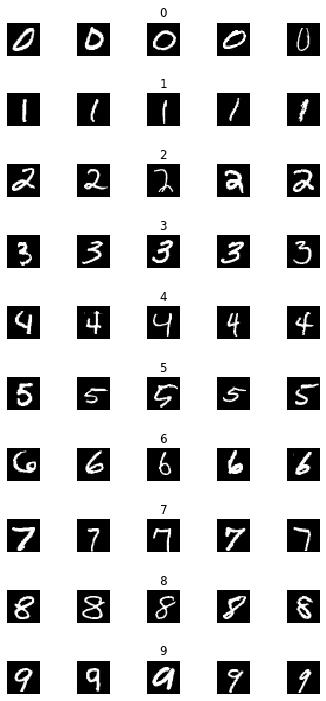

In [7]:
num_of_samples = []

cols = 5
num_classes = 10

fig, axs = plt.subplots(nrows = num_classes, ncols = cols, figsize = (5, 10))
fig.tight_layout()

for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j]
        #if we don't specify cmap then it would result in a colorful representation
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected)-1), :, :], cmap = plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j))
            #we will record the number of images for each category
            num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

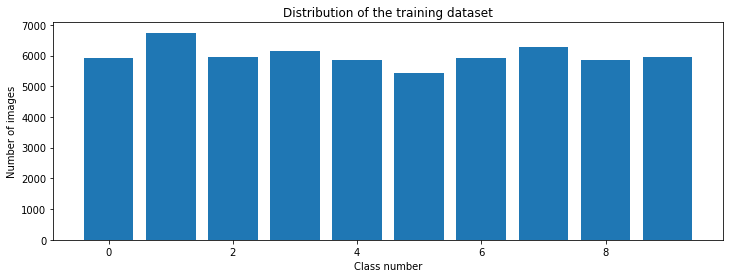

In [8]:
#summarizing and visualizing the numbers behind our data
print(num_of_samples)
plt.figure(figsize = (12,4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

In case of ANNs we flattened the images into a single array. However, in case of CNN we will leave them as 28*28 but also
add a depth of 1. The first step in preparing our data for use in CNN is to add depth to our data.
CNNs work by applying a kernel to all the channels of an image. In case of a grayscale image there is 1 channel present.
Therefore, our data must reflect the presence of this depth.

In [9]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [10]:
#one-hot encoding the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [11]:
#normalizing the data
X_train = X_train/255
X_test = X_test/255

The very first revolutionary convolutional architecture was designed back in 1998. It was called LeNet and was used to recognize hand-written digits
on cheques. After this many such convolutional architectures have been researched and examined such as AlexNet, ZFNet or even GoogleNet.
Lets define the leNet model function

In [12]:
def leNet_model():
  model = Sequential()
  '''
  Adding the convolutional layer. The first parameter specifies how many filters does the convolution layer is going to 
  have. The second argument is a tuple that we want to use to define the size of our filters. Also this is the first layer 
  of our network so we need to specify the input shape of our data. Padding is done so that the kernel operation outputs 
  the image of the same dimensionality. Preserving spatial dimensionality in most cases is quite a desirable property. For 
  instance, it allows to extract low level features and thus by keeping all the information on the border this tends to 
  improve performance. However, we won't be using the padding argument. This is because our dataset contains centered 
  images of hand-written characters. So we are not interested in the edges on the outside of the image.
  The output will be an image with shape (24, 24) and a depth of 30
  '''
  model.add(Conv2D(30, (5, 5), input_shape = (28, 28, 1), activation = 'relu'))

  '''
  Next we will add a pooling layer. MaxPooling2D takes in only one argument which is the size of the pooling element. This 
  will scale down the image representation to half of the original size.
  '''
  model.add(MaxPooling2D(pool_size = (2,2)))
  
  '''
  As we move forward the image starts to gain depth. This depth contains features extracted from the original image from 
  each of the filters and are very valuable. We will follow the leNet architecture and add another convolutional layer as 
  before. Since we are dealing with a dense input here we will use fewer filters so that it requires less computational 
  power. The output of this layer is going to be that each image is going to be scaled down to 10*10 but with a depth of 15.
  '''
  model.add(Conv2D(15, (3, 3), activation = 'relu'))
  
  '''
  Now we will feed the output from the above layer into another pooling layer. The resulting output of this layer is a 5*5 
  image with a depth of 15.
  '''
  model.add(MaxPooling2D(pool_size = (2,2)))

  '''
  Now we will flatten our data for it to be fed into a fully connected layer. It will reshape our data to a 1-dimensional 
  array of 375.
  '''
  model.add(Flatten())

  model.add(Dense(500, activation = 'relu'))
  #defining the final output layer
  model.add(Dense(num_classes, activation = 'softmax'))

  model.compile(Adam(lr = 0.01), loss = 'categorical_crossentropy', metrics = ['accuracy'])

  return model

In [13]:
model = leNet_model()
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               188000    
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

In [14]:
history = model.fit(X_train, y_train, epochs = 10, validation_split = 0.1, batch_size = 400, verbose = 1, shuffle = 1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 13s 234us/step - loss: 0.2067 - accuracy: 0.9372 - val_loss: 0.0543 - val_accuracy: 0.9843
Epoch 2/10
54000/54000 [==============================] - 13s 241us/step - loss: 0.0487 - accuracy: 0.9845 - val_loss: 0.0382 - val_accuracy: 0.9893
Epoch 3/10
54000/54000 [==============================] - 13s 238us/step - loss: 0.0383 - accuracy: 0.9881 - val_loss: 0.0539 - val_accuracy: 0.9847
Epoch 4/10
54000/54000 [==============================] - 13s 246us/step - loss: 0.0317 - accuracy: 0.9898 - val_loss: 0.0409 - val_accuracy: 0.9880
Epoch 5/10
54000/54000 [==============================] - 12s 229us/step - loss: 0.0272 - accuracy: 0.9910 - val_loss: 0.0417 - val_accuracy: 0.9877
Epoch 6/10
54000/54000 [==============================] - 12s 227us/step - loss: 0.0201 - accuracy: 0.9935 - val_loss: 0.0385 - val_accuracy: 0.9902
Epoch 7/10
54000/54000 [==============================] -

Text(0.5, 0, 'epoch')

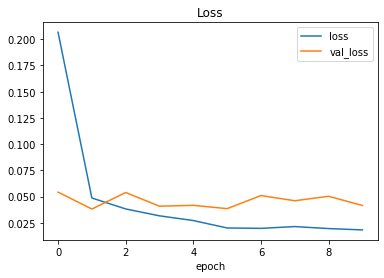

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

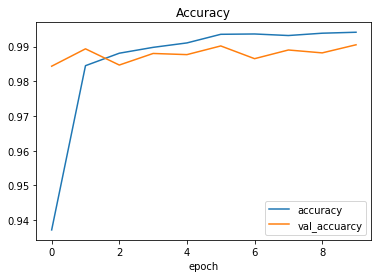

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuarcy'])
plt.title('Accuracy')
plt.xlabel('epoch')

<Response [200]>


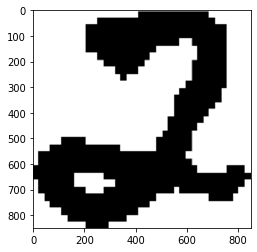

In [17]:
'''
If compared to the previous ANN, then we can see how small the loss is in case of CNN. It is around 0.05.
'''
import requests
#PIL stands for python imaging library
from PIL import Image

url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'

response = requests.get(url, stream = 1)
#response 200 implies a successful get request
print(response)

#we will use the zImage module to identify the raw content of the response
img = Image.open(response.raw)

plt.imshow(img)

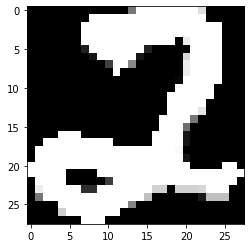

In [18]:
import cv2

img = np.asarray(img)
img = cv2.resize(img, (28, 28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))

In [19]:
img = img/255
img = img.reshape(1, 28, 28, 1)

In [20]:
prediction = model.predict_classes(img)
print("predicted_digit:", str(prediction))

predicted_digit: [2]


In [21]:
#let's evaluate the model that we have created
score = model.evaluate(X_test, y_test, verbose = 0)
print(type(score))
print('Test score:', score[0])
print('Test accuracy:', score[1])

<class 'list'>
Test score: 0.03489799774901875
Test accuracy: 0.9908000230789185


Now that we have plotted the loss and the accuracy we can clearly see that the CNN is performing better than the ANN. Our accuracy is generally higher and a lower degree of overfitting was seen. Although to some degree we can still see some overfitting which is reasonable since we made use of 500 nodes.

As effective as the CNN was in classifying images, on top of that we will introduce another technique of reducing overfitting. We will go back to the leNet model function and we will add a speciific type of layer that will help reduce overfitting in our data. This layer type is called the <b>dropout layer</b>. This function essentially functions by randomly setting a fraction of input units to 0 at each update during training, which helps prevent overfitting.

What dropout does is it turns off some of the nodes, hence they no longer communicate information along the network. As mentioned earlier, the dropout function randomly selects a pre-defined fraction of nodes to be turned off. What it means is that every time the network updates the parameters during the training process it selects random nodes which it is going to turn off. It is important to note here that a different set of nodes are turned off at each update. This process reduces overfitting because it forces the network to use various combination of nodes to classify the same data. As with each update a random set of nodes survives the dropout process, each node is forced to learn the dataset in a more independent way with a more unique neural arrangement each time. This causes the neural network in general to become more versatile and allows the weights to be more uniformly distributed among the network. 

Now this occurs only during training. When the network is used to classify new data, then all the nodes are used to classify the new data. When dropout is not used then the nodes can combine all of their independent learning to form a more robust network. This results in a network with reduced generalised error and less overfitting, when it is exposed to new data.

In [22]:
def leNet_model_d():
  model = Sequential()
  model.add(Conv2D(30, (5, 5), input_shape = (28, 28, 1), activation = 'relu'))
  model.add(MaxPooling2D(pool_size = (2, 2)))
  model.add(Conv2D(15, (3, 3), activation = 'relu'))
  model.add(MaxPooling2D(pool_size = (2, 2)))
  model.add(Flatten())
  model.add(Dense(500, activation = 'relu'))

  '''
  For the purpose of demonstration we are only going to use a single dropout layer. However, more than one dropout layer 
  can be used in a network to obtain the desired performance. The location of these layers among the network can also vary. 
  We can place them between the convolutional layers or between the fully connected layers. Typically the dropout layer is 
  used between layers that have a high number of parameters because these high parameter layers are more likely to overfit 
  and memorise the data and for this reason we will place our dropout layer data between the fully connected ones. The first 
  parameter refers to the fraction of nodes that will be deactivated. 0 representing none and 1 representing all of the 
  nodes will be dropped.
  '''
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation = 'softmax'))
  model.compile(Adam(lr = 0.01), loss = 'categorical_crossentropy', metrics = ['accuracy'])
  return model

In [27]:
model_d = leNet_model_d()
print(model_d.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 500)               188000    
_________________________________________________________________
dropout_2 (Dropout)          (None, 500)              

In [28]:
 history_d = model_d.fit(X_train, y_train, epochs = 10, validation_split = 0.1, batch_size = 400, verbose = 1, shuffle = 1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 13s 234us/step - loss: 0.2287 - accuracy: 0.9270 - val_loss: 0.0472 - val_accuracy: 0.9862
Epoch 2/10
54000/54000 [==============================] - 12s 227us/step - loss: 0.0723 - accuracy: 0.9778 - val_loss: 0.0428 - val_accuracy: 0.9890
Epoch 3/10
54000/54000 [==============================] - 12s 228us/step - loss: 0.0561 - accuracy: 0.9827 - val_loss: 0.0377 - val_accuracy: 0.9893
Epoch 4/10
54000/54000 [==============================] - 13s 234us/step - loss: 0.0496 - accuracy: 0.9848 - val_loss: 0.0410 - val_accuracy: 0.9890
Epoch 5/10
54000/54000 [==============================] - 12s 221us/step - loss: 0.0446 - accuracy: 0.9868 - val_loss: 0.0331 - val_accuracy: 0.9900
Epoch 6/10
54000/54000 [==============================] - 12s 220us/step - loss: 0.0432 - accuracy: 0.9868 - val_loss: 0.0379 - val_accuracy: 0.9883
Epoch 7/10
54000/54000 [==============================] -

Text(0.5, 0, 'epoch')

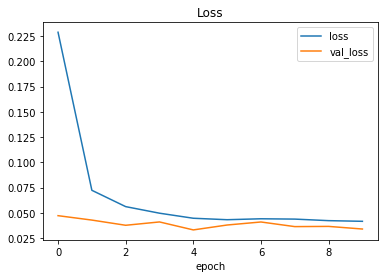

In [29]:
plt.plot(history_d.history['loss'])
plt.plot(history_d.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

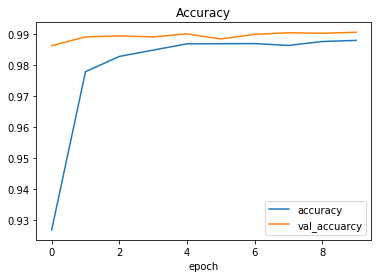

In [30]:
plt.plot(history_d.history['accuracy'])
plt.plot(history_d.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuarcy'])
plt.title('Accuracy')
plt.xlabel('epoch')

Lets finally visualize what each of our filters are seeing into code. This will help us to see the variety of features that 
the filters detect. We will begin by instantiating the two layers that we want to see the output for. This process basically
requires to export layers from our fully defined model, so we can log the ouput along various sections of the network. We 
can do so by something called the model class api. We are interested in seeing the output of the two convolutional layers. 
So we begin by defining 2 separate layers. The model argument takes in 2 arguments. The first argument defines all the 
inputs into your network, while the second argument defines the output that you want from the model.

In [31]:
layer1 = Model(inputs = model_d.layers[0].input, outputs = model_d.layers[0].output)
#the output in layer two will be different as we are interested in the output of second convolutional layer which is the 
#3rd layer in the model
layer2 = Model(inputs = model_d.layers[0].input, outputs = model_d.layers[2].output)

visual_layer1, visual_layer2 = layer1.predict(img), layer2.predict(img)
print(visual_layer1.shape)
print(visual_layer2.shape)

(1, 24, 24, 30)
(1, 10, 10, 15)


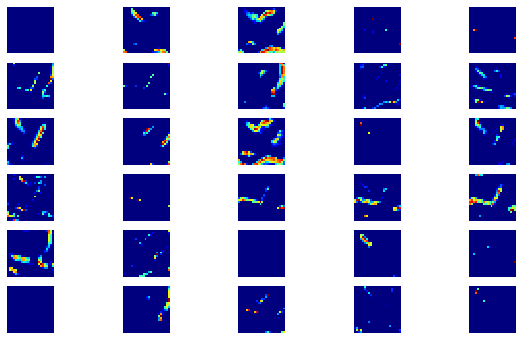

In [32]:
#layer 1
plt.figure(figsize = (10, 6))
for i in range(30):
    plt.subplot(6, 5, i+1)
    plt.imshow(visual_layer1[0, :, :, i], cmap = plt.get_cmap('jet'))
    plt.axis('off')

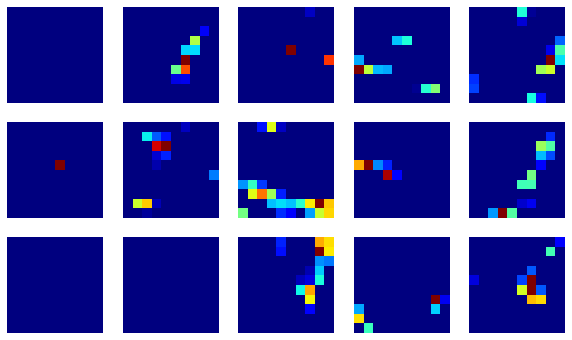

In [33]:
#layer 2
plt.figure(figsize=(10, 6))
for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.imshow(visual_layer2[0, :, :, i], cmap=plt.get_cmap('jet'))
    plt.axis('off')